# 1. Import all Dependencies

In [1]:
import tensorflow
import cv2
import mediapipe as mp
import sklearn, numpy as np
from matplotlib import pyplot as plt
import os
import time

# 2. KeyPoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # color conversion
    image.flags.writeable = False                  # image is no longer writeable
    results = model.process(image)                 # make prediction
    image.flags.writeable = True                   # image is writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)    # color conversion
    return image, results

In [4]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [14]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

![Pose Connections](https://miro.medium.com/v2/resize:fit:828/format:webp/1*JJCbfzhTySIqKr1L5pDkpQ.png)

In [5]:
cap = cv2.VideoCapture(1)
# acces mediapipe model  
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    # read feed
    ret,frame = cap.read()
    # make detection
    image , results = mediapipe_detection(frame, holistic)
    
    # draw landmarks
    draw_landmarks(image, results)

    # show to screen
    cv2.imshow('openCV Feed', image)
    # break loop
    if cv2.waitKey(10) & 0xff == ord('q'):
      break

  cap.release()
  cv2.destroyAllWindows()

c:\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [37]:
len(results.face_landmarks.landmark)

468

In [41]:
draw_landmarks(frame, results)

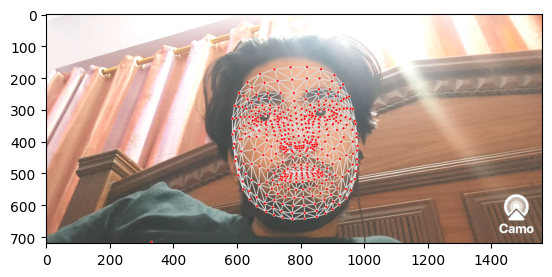

In [42]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [57]:
results.pose_landmarks.landmark[0].visibility

0.9991781711578369

- Keypoints For Pose 

In [58]:
pose = []

for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [64]:
# using flatten to reshape all landmarks into one array
pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten()

In [65]:
pose.shape

(132,)

- Keypoints for Left hand

In [ ]:
# for left hand 
lh = np.array([[res.x,res.y,res.z,res.visibility] for res in results.left_hand_landmarks.landmark]).flatten()

- as you see the above code gives error so therefore we should write a condition that if there are no landmarks then it  should return an empty array instead of an error 
- we will generate a 21*3 array of zeros if no landmarks are present , this value is found by generating landmarks one time and checking the shape of array

In [67]:
# for left hand 
lh = np.array([[res.x,res.y,res.z,res.visibility] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [68]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

- Error handling setup for all landmarks

In [6]:
# for pose 
pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
# for left hand 
lh = np.array([[res.x,res.y,res.z,res.visibility] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
# for right hand
rh = np.array([[res.x,res.y,res.z,res.visibility] for res in results.right_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
# for face 
face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404) # 468*3


In [72]:
face

array([ 0.50846153,  0.66503286, -0.04655882, ...,  0.60034895,
        0.43777364,  0.03221481])

In [7]:
# creating a function to do so

def extract_keypoints(results):
    # for pose 
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    # for left hand 
    lh = np.array([[res.x,res.y,res.z,res.visibility] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    # for right hand
    rh = np.array([[res.x,res.y,res.z,res.visibility] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    # for face 
    face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3) 

    return np.concatenate([pose, face, lh , rh])


In [9]:
extract_keypoints(results)[:-10]

array([ 0.64788467,  0.44363323, -1.73415589, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [167]:
# path for exported data , numpy arrays
DATA_PATH = os.path.join('MP_DATA')

# Actions that we try to detect
actions = np.array(['Working','Not Working'])

# thirdty videos worth of data 
no_sequences = 30

# videos are going to be 30 frames in lenght
sequence_length = 30

In [168]:
# hello 
## 0   -- sequences
## 1
## ....... 
## 29

In [169]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collecting Keypoint Values to folders for trianing and testing

In [170]:
cap = cv2.VideoCapture(0)
# acces mediapipe model  
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
  # loop through actions
  for action in actions:
    # loop thorugh sequences aka videos
    for sequence in range(no_sequences):
        # loop through video length aka sequence length
        for frame_num in range(sequence_length):

            # read feed
            ret,frame = cap.read()
            # make detection
            image , results = mediapipe_detection(frame, holistic)
            
            # draw landmarks
            draw_landmarks(image, results)

            # applying wait logic
            if frame_num == 0:
                cv2.putText(image, 'Starting Collection', (120,200),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2, cv2.LINE_AA)
                cv2.putText(image, 'Collecting frames for {} video number {}'.format(action,sequence), (15,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                # show to screen
                cv2.imshow('openCV Feed', image)
                cv2.waitKey(2000)
            else:
                cv2.putText(image, 'Collecting frames for {} video number {}'.format(action,sequence), (15,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                # show to screen
                cv2.imshow('openCV Feed', image)

            # Export Keypoints
            keypoints = extract_keypoints(results)
            npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
            np.save(npy_path, keypoints)
            
            # break loop
            if cv2.waitKey(10) & 0xff == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()

c:\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [59]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess the Data and Create Labels and Features

In [171]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [172]:
label_map = {label:num for num , label in enumerate(actions)}

In [173]:
label_map

{'Working': 0, 'Not Working': 1}

In [174]:
sequences, labels = [], []

for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [175]:
sequences, labels = [], []

# Step 1: Determine the maximum shape of the frames
max_shape = (0, 0)  # Assuming each frame is a 2D array

for action in actions:
    for sequence in range(no_sequences):
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            max_shape = tuple(max(max_shape[i], res.shape[i]) for i in range(len(res.shape)))

# Step 2: Load the data and pad it
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            if res.shape != max_shape:
                # Create a zero-padded array of the max shape
                padded_res = np.zeros(max_shape)
                # Determine the slice to insert the original array
                slices = tuple(slice(0, dim) for dim in res.shape)
                # Insert the original array into the padded array
                padded_res[slices] = res
            else:
                padded_res = res
            window.append(padded_res)
        sequences.append(window)
        labels.append(label_map[action])

In [176]:
np.array(sequences).shape

(60, 30, 1662)

In [177]:
np.array(labels).shape

(60,)

In [178]:
X = np.array(sequences)
X.shape

(60, 30, 1662)

In [179]:
y = to_categorical(labels).astype(int)
y.shape

(60, 2)

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [181]:
y_test.shape

(12, 2)

In [182]:
X_train.shape

(48, 30, 1662)

# 7. Build and Train LSTM NETWORK

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

In [93]:
log_dir = os.path.join('logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [94]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu',input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


In [95]:
res = [.7,0.2,0.1]

In [96]:
actions[np.argmax(res)]

'Working'

In [140]:
model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics= ['categorical_accuracy'])

In [141]:
model.fit(X_train, y_train, epochs = 300, callbacks=[tb_callback])

Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - categorical_accuracy: 0.5139 - loss: 0.6954
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - categorical_accuracy: 0.5104 - loss: 3.6172
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - categorical_accuracy: 0.4896 - loss: 0.9027
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - categorical_accuracy: 0.6285 - loss: 0.7895
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 0.6458 - loss: 1.1678
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - categorical_accuracy: 0.6111 - loss: 1.1922
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - categorical_accuracy: 0.5486 - loss: 2.4567
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - categorical_accuracy: 0.4479 - loss: 6.8880
Epoch 9/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - categorical_accuracy: 0.5972 - loss: 4.7218
Epoch 10/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - categorical_accuracy: 0.5104 - loss: 4.1092
Epoch 11/300
2/2 ━━━━━━━━━━━━━━━━

In [155]:
model.fit(X_train, y_train, epochs = 200, callbacks=[tb_callback])

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - categorical_accuracy: 0.9375 - loss: 0.1205
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - categorical_accuracy: 0.9479 - loss: 0.1218
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step - categorical_accuracy: 0.9132 - loss: 0.1815
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - categorical_accuracy: 0.9618 - loss: 0.1210
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - categorical_accuracy: 0.9271 - loss: 0.1402
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - categorical_accuracy: 0.9132 - loss: 0.1495
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - categorical_accuracy: 0.8889 - loss: 0.1865
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - categorical_accuracy: 0.9618 - loss: 0.1392
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - categorical_accuracy: 0.9271 - loss: 0.2648
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - categorical_accuracy: 0.9514 - loss: 0.1853
Epoch 11/200
2/2 ━━━━━━━━━━━━━━

In [156]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                  │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,789,928 (6.83 MB)

 Trainable params: 596,642 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,286 (4.55 MB)

## Model with CNN

In [122]:
# optional if the above model does not give good results 


# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, TimeDistributed, LSTM, Dense, GlobalAveragePooling2D, Dropout
# from tensorflow.keras.utils import to_categorical

# # Define the CNN-LSTM model
# input_layer = Input(shape=(sequence_length, 1662))
# cnn = TimeDistributed(Dense(1024, activation='relu'))(input_layer)
# cnn = TimeDistributed(Dense(512, activation='relu'))(cnn)
# cnn = TimeDistributed(Dense(256, activation='relu'))(cnn)

# # Add LSTM layers
# lstm = LSTM(64, return_sequences=True, activation='relu')(cnn)
# lstm = Dropout(0.2)(lstm)
# lstm = LSTM(128, return_sequences=True, activation='relu')(lstm)
# lstm = Dropout(0.2)(lstm)
# lstm = LSTM(64, return_sequences=False, activation='relu')(lstm)
# lstm = Dropout(0.2)(lstm)

# # Add Dense layers
# dense = Dense(64, activation='relu')(lstm)
# dense = Dense(32, activation='relu')(dense)
# output_layer = Dense(actions.shape[0], activation='softmax')(dense)

# # Create the model
# model = Model(inputs=input_layer, outputs=output_layer)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# # Train the model
# model.fit(X_train,y_train , epochs=100, validation_split=0.2)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - categorical_accuracy: 0.5104 - loss: 0.6997 - val_categorical_accuracy: 0.5000 - val_loss: 0.6924
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step - categorical_accuracy: 0.5175 - loss: 0.6920 - val_categorical_accuracy: 0.5000 - val_loss: 0.6761
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step - categorical_accuracy: 0.5384 - loss: 0.7134 - val_categorical_accuracy: 0.5000 - val_loss: 0.7087
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step - categorical_accuracy: 0.5000 - loss: 0.9348 - val_categorical_accuracy: 0.7000 - val_loss: 0.6712
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step - categorical_accuracy: 0.6606 - loss: 0.6882 - val_categorical_accuracy: 0.3000 - val_loss: 0.6909
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step - categorical_accuracy: 0.4929 - loss: 0.6847 - val_categorical_accuracy: 0.6000 - val_loss: 0.6884
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 295ms/step - categorical_accuracy: 0.6782 - loss: 0.6774

# 8. Mark Predictions

In [157]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [158]:
res 

array([[3.00153182e-08, 1.00000000e+00],
       [1.00000000e+00, 2.32894496e-26],
       [1.00000000e+00, 7.17353491e-14],
       [1.04214296e-01, 8.95785630e-01],
       [5.38991226e-05, 9.99946117e-01],
       [1.00000000e+00, 7.12139125e-10],
       [1.00000000e+00, 1.61040960e-18],
       [4.25436247e-06, 9.99995708e-01],
       [9.99999166e-01, 8.12076678e-07],
       [1.00000000e+00, 5.25801378e-35],
       [1.00000000e+00, 1.76590395e-34],
       [8.92855132e-06, 9.99991059e-01]], dtype=float32)

In [159]:
actions[np.argmax(res[1])]

'Working'

In [160]:
actions[np.argmax(y_test[1])]

'Working'

# 9. Save Weights

In [166]:
model.save('actions_w_w.h5')

In [129]:
del model

In [154]:
model.load_weights('actions_w_w.h5')

In [49]:
from keras.models import load_model

# Load the model including weights from the .h5 file
model = load_model('actions_w_w.h5')

# 10. Evaluation

In [161]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [162]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [163]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [164]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[3, 2],
        [2, 5]],

       [[5, 2],
        [2, 3]]], dtype=int64)

In [165]:
accuracy_score(ytrue, yhat)

0.6666666666666666

# 11. Test in real time

In [152]:
from scipy import stats

In [51]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [52]:
def extract_keypoints(results):
    # Pose
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    # Left hand
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)
    # Right hand
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)
    # Face
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    return np.concatenate([pose, lh, rh, face])

In [53]:
def pad_sequence(sequence, max_sequence_length, expected_dimensionality):
    padded_sequence = np.zeros((max_sequence_length, expected_dimensionality))
    sequence_length, sequence_dimensionality = sequence.shape
    if sequence_dimensionality < expected_dimensionality:
        # Pad with zeros along the last dimension
        padded_sequence[:sequence_length, :sequence_dimensionality] = sequence
    else:
        # Truncate or resize the sequence if it exceeds the expected dimensionality
        padded_sequence[:sequence_length, :expected_dimensionality] = sequence[:, :expected_dimensionality]
    return padded_sequence

In [54]:
# New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            # Convert sequence to a numpy array
            sequence_array = np.array(sequence)
            # Ensure the sequence has the same shape as the padded sequences
            padded_sequence = pad_sequence(sequence_array, max_sequence_length=30, expected_dimensionality=1704)
            # Perform prediction
            res = model.predict(np.expand_dims(padded_sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            # Viz logic
            if np.unique(predictions[-10:])[0] == np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

c:\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Not Working
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Not Working
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Not Working
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Not Working
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Not Working
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Not Working
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Not Working
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Not Working
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Working
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Working
<class 'mediapipe.python.solution

In [56]:
cap.release()
cv2.destroyAllWindows()